In [10]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from scipy import io as sio
from tensorflow.python.framework import ops
from dfs2 import DeepFeatureSelectionNew
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize

# ourdataB = sio.loadmat("/Volumes/TONY/Regeneron/Data/OriginalData/newDataB_2labels.mat")
# ourdata = sio.loadmat("/Users/xupeng.tong/Documents/Data/OriginalData/newDataB_2labels.mat")
ourdata = sio.loadmat("/Users/xupeng.tong/Documents/Data/OriginalData/B_mean_2labels.mat")
# ourdata = sio.loadmat("/Users/xupeng.tong/Documents/Data/OriginalData/Q_2labels_unstandardized.mat")

inputX = ourdata['X']
inputX = normalize(inputX, axis=0)
inputY = ourdata['Y'][0,:]
columnNames = ourdata['columnNames']

X_train, X_test, y_train, y_test = train_test_split(inputX, inputY, test_size=0.2, random_state=42)

(10684, 7205)

# Run the Deep Feature Selection
## Changing lambda1 slightly

In [56]:
ops.reset_default_graph()

weights = []
for lambda1 in xrange(0, 10, 1):
    lambda1 /= 10000.
    dfsMLP = DeepFeatureSelectionNew(X_train, X_test, y_train, y_test, n_input=1, hidden_dims=[50], learning_rate=0.01, \
                                     lambda1=0.0001, lambda2=1, alpha1=0.00001, alpha2=0, activation='tanh', \
                                     weight_init='uniform',epochs=20, optimizer='Adam', print_step=1)
    dfsMLP.train(batch_size=2000)
    print("Train finised for lambda1:" + str(lambda1))
    weights.append(dfsMLP.selected_ws[0])

epoch 0: global loss = 0.617241680622
('Train accuracy:', 0.78635776)
('Test accuracy:', 0.76462328)
epoch 1: global loss = 0.503898203373
('Train accuracy:', 0.77723175)
('Test accuracy:', 0.7552644)
epoch 2: global loss = 0.434178233147
('Train accuracy:', 0.82988185)
('Test accuracy:', 0.80159104)


KeyboardInterrupt: 

In [2]:
for random_state in xrange(5):
    X_train, X_test, y_train, y_test = train_test_split(inputX, inputY, test_size=0.2, random_state=random_state)

    dfsMLP = DeepFeatureSelectionNew(X_train, X_test, y_train, y_test, n_input=1, hidden_dims=[30], learning_rate=0.01, \
                                         lambda1=0.0001, lambda2=1, alpha1=0.0001, alpha2=0, activation='tanh', \
                                         weight_init='uniform',epochs=50, optimizer='Adam', print_step=10)
    dfsMLP.train(batch_size=2000)

    print(dfsMLP.test_Accs[-1])

epoch 0: global loss = 0.652113676071
('Train accuracy:', 0.70480871)
('Test accuracy:', 0.68273282)
epoch 10: global loss = 0.20091855526
('Train accuracy:', 0.95811397)
('Test accuracy:', 0.92185307)
epoch 20: global loss = 0.0920763164759
('Train accuracy:', 0.98736399)
('Test accuracy:', 0.96724379)
epoch 30: global loss = 0.0782158449292
('Train accuracy:', 0.98829997)
('Test accuracy:', 0.96724379)
epoch 40: global loss = 0.0726338177919
('Train accuracy:', 0.98876798)
('Test accuracy:', 0.96677583)
('Final train accuracy:', 0.98865098)
('Final test accuracy:', 0.96583998)
0.96584
epoch 0: global loss = 0.655643165112
('Train accuracy:', 0.64888263)
('Test accuracy:', 0.6373421)
epoch 10: global loss = 0.20759986341
('Train accuracy:', 0.95507193)
('Test accuracy:', 0.92185307)
epoch 20: global loss = 0.0954417213798
('Train accuracy:', 0.98525798)
('Test accuracy:', 0.97285914)
epoch 30: global loss = 0.0818562060595
('Train accuracy:', 0.98642796)
('Test accuracy:', 0.97379506)

KeyboardInterrupt: 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(inputX, inputY, test_size=0.2, random_state=2)

dfsMLP = DeepFeatureSelectionNew(X_train, X_test, y_train, y_test, n_input=1, hidden_dims=[150], learning_rate=0.01, \
                                     lambda1=0.001, lambda2=1, alpha1=0.001, alpha2=0, activation='tanh', \
                                     weight_init='uniform',epochs=30, optimizer='Adam', print_step=1)
dfsMLP.train(batch_size=2000)

# More layers, overfitting

# Create feature selection function

In [130]:
import numpy as np
from sklearn.preprocessing import normalize

indexes_xgboost = sio.loadmat("xgboost_result")['importance_rank']

weights = np.load('weights-7000-0-0001.npy')

indexes_dfs = np.argsort(abs(weights[1]))[::-1]

weights_0_10 = np.load("weights-0-10.npy")
averagedWeight = abs(normalize(weights_0_10)).sum(axis=0)
indexes_average_dfs = np.argsort(averagedWeight)[::-1]

indexes_intersect, indexes_union = [], []
for i in xrange(4):
    indexes_intersect.append(np.argsort(abs(weights_0_10[i]))[::-1][:100].tolist())
    indexes_union.append(np.argsort(weights_0_10[i])[::-1][:25].tolist())

intersected = reduce(np.intersect1d, indexes_intersect).tolist()
union = reduce(np.union1d, indexes_union).tolist()

#     print(np.intersect1d(_indexes))

normalized_weights = normalize(abs(weights_0_10))

def unionDFSfeatures():
    return X_train[:, union], X_test[:, union]

def intersectDFSfeatures():
    return X_train[:, intersected], X_test[:, intersected]

def topXGBoostfeatures(a,b):
    return X_train[:, indexes_xgboost.tolist()[0][a:b]], X_test[:, indexes_xgboost.tolist()[0][a:b]]

def topDFSfeatures(a,b,n):
    indexes_dfs = np.argsort(abs(weights_0_10[n]))[::-1]
    return X_train[:, indexes_dfs.tolist()[a:b]], X_test[:, indexes_dfs.tolist()[a:b]]

def topAveDFSfeatures(a,b):
    return X_train[:, indexes_average_dfs.tolist()[a:b]], X_test[:, indexes_average_dfs.tolist()[a:b]]

def pickOneDFSfeatures(a,b,n):
    indexx = np.argsort(abs(allweights_0_30[n]))[::-1]
    return X_train[:, indexx.tolist()[a:b]], X_test[:, indexx.tolist()[a:b]]

def topDFSTemp(a,b):
    temp = np.argsort(abs(dfsMLP.selected_ws[0]))[::-1]
    return X_train[:, temp.tolist()[a:b]], X_test[:, temp.tolist()[a:b]]

In [124]:
len(intersected)

97

In [113]:
keke, keke_test = unionDFSfeatures()
scores = cross_val_score(svm, keke, y_train, cv=5)
print(np.mean(scores))

0.94068025623


In [46]:
intersection = _indexes[0]
for i in xrange(10):
    intersection = np.intersect1d(intersection,_indexes[i])

In [118]:
normalize(weights_0_10)

array([[ 0.053165  , -0.0692238 , -0.0629655 , ...,  0.02322265,
        -0.00399071, -0.00274285],
       [-0.05841333, -0.07720602,  0.04862429, ..., -0.00258179,
        -0.00258207, -0.00461366],
       [-0.07561268,  0.08889794,  0.07643845, ...,  0.01474237,
         0.00146785,  0.00329684],
       ..., 
       [-0.05750447,  0.0789    ,  0.07290675, ..., -0.01987921,
        -0.00194573, -0.02031641],
       [-0.06465667, -0.07349714,  0.05596737, ...,  0.00895705,
         0.00192216, -0.0129387 ],
       [ 0.06009663,  0.07475352,  0.06533995, ...,  0.01963735,
        -0.00631849,  0.0011845 ]], dtype=float32)

In [69]:
_indexes[1]

[1376, 1374, 4886, 4884, 4882, 4881, 1377, 4875, 1370, 1368]

In [70]:
_indexes[2]

[1383, 4881, 4880, 1368, 1370, 4884, 4875, 4879, 4887, 1378]

In [44]:
np.intersect1d((_indexes[0],_indexes[1],_indexes[2],_indexes[3],_indexes[4],_indexes[5]))

TypeError: intersect1d() takes at least 2 arguments (1 given)

In [131]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

svm = LinearSVC()

# keke, keke_test = unionDFSfeatures()
# scores = cross_val_score(svm, keke, y_train, cv=5)
# print(np.mean(scores))

# clf = LogisticRegression(penalty="l2")
keke, keke_test = intersectDFSfeatures()
scores = cross_val_score(svm, keke, y_train, cv=5)
print(np.mean(scores))

keke, keke_test = topAveDFSfeatures(1,100)
scores = cross_val_score(svm, keke, y_train, cv=5)
print(np.mean(scores))

# clf.fit(keke, y_train)
# y_pred = clf.predict(keke_test)
# print(accuracy_score(y_test, y_pred))
for i in xrange(0,10):
    keke, keke_test = topDFSfeatures(0,100,i)
    scores = cross_val_score(svm, keke, y_train, cv=5)
    print(np.mean(scores))

# keke, keke_test = topDFSTemp(1,100)
# scores = cross_val_score(svm, keke, y_train, cv=5)

# print(np.mean(scores))
    
keke, keke_test = topXGBoostfeatures(1,100)
scores = cross_val_score(svm, keke, y_train, cv=5)
print(np.mean(scores))

# xtrain, xtest = X_train[:,featureMask], X_test[:, featureMask]
# svm.fit(xtrain, y_train)
# y_pred = svm.predict(xtest)
# print(accuracy_score(y_test, y_pred))

0.948052922309
0.929331598861
0.942435669554
0.948403251844
0.930969847327
0.942903573927
0.944425274193
0.944425548342
0.947233387132
0.936116867724
0.943723314576
0.943137629171
0.912716976472


array([[  4.55322474e-01,  -7.58894861e-01,   2.13725269e-01, ...,
          5.48893996e-02,  -2.82727694e-03,  -2.01065376e-01],
       [  4.74327683e-01,   7.14306176e-01,   3.79547536e-01, ...,
         -1.37939259e-01,   6.67297631e-04,   3.26650334e-05],
       [  4.68566984e-01,   6.28351867e-01,  -3.73557568e-01, ...,
         -2.04701768e-03,   2.31994782e-04,   9.24117863e-04],
       ..., 
       [  1.77476835e-03,   5.88434935e-01,   2.89655983e-01, ...,
         -5.78936655e-04,   4.45973128e-05,   1.77973032e-03],
       [  2.41198301e-01,  -5.24440110e-01,   2.72421718e-01, ...,
          7.55662390e-04,  -1.57816429e-03,   7.49657571e-04],
       [ -4.24645722e-01,  -5.12819052e-01,   3.77454340e-01, ...,
         -7.25072576e-04,  -1.11448823e-03,  -2.63638794e-05]], dtype=float32)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb

# rf = RandomForestClassifier(criterion="entropy", n_estimators = 300, max_depth = 100)
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

gbm = xgb.XGBClassifier(max_depth=3, n_estimators=400, learning_rate=0.05).fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# featurescores = gbm.feature_importances_

print(accuracy_score(y_test, y_pred))

# gbm10 = xgb.XGBClassifier(max_depth=3, n_estimators=400, learning_rate=0.05).fit(X_train10, y_train)
# y_pred10 = gbm.predict(X_test10)

# print(accuracy_score(y_test, y_pred))

indexes_xgboost = np.argsort(gbm.feature_importances_)[::-1]

np.save("indexes_xgboost",indexes_xgboost)

0.995788488535


In [ ]:
# top100Features = np.array([columnNames[0][i] for i in indexes[0:200]])
# top100Features = np.array([columnNames[i] for i in indexes[0:100]])
# top100Features = top100Features.reshape(100,)

In [7]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

plotly.tools.set_credentials_file(username='tonyabracadabra', api_key='6gs9i5iec7')

data = [
    go.Heatmap(
        z=np.abs(weights)
    )
]

py.iplot(data, filename='basic-heatmap')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tonyabracadabra/0 or inside your plot.ly account where it is named 'basic-heatmap'


In [141]:
keke_train = X_train[:,np.argwhere(abs(weights[0])>0.15).reshape(294,)]
keke_test = X_test[:,np.argwhere(abs(weights[0])>0.15).reshape(294,)]

In [119]:
dfs_train500

(500, 7203)

In [116]:
X_train.shape

(8547, 7203)

In [93]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

acc_scores_xgboost_svm = []
# acc_scores_xgboost = []
for n in xrange(1,1000):
    if n % 50 == 0:
        print(n)
    xtrain, xtest = topXGBoostfeatures(n)
    svm.fit(xtrain, y_train)
    y_pred = svm.predict(xtest)
    acc_scores_xgboost_svm.append(accuracy_score(y_test, y_pred))

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


In [57]:
# acc_scores_dfs = []
acc_scores_dfs_svm = []
for n in xrange(1,1000):
    if n % 50 == 0:
        print(n)
    xtrain, xtest = topDFSfeatures(n)
    svm.fit(xtrain, y_train)
    y_pred = svm.predict(xtest)
    acc_scores_dfs_svm.append(accuracy_score(y_test, y_pred))

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


0.907219010365
0.936702347577
0.936702347577
0.936702347577
0.936702347577
0.936702347577
0.936702347577
0.936702347577
0.936702347577
0.936702347577
0.936702347577
0.912716976472


In [192]:
acc_single_dfs, acc_single_ave_dfs, acc_single_xgb = [], [], []
for i in xrange(100):
    keke, keke_test = topDFSfeatures(i,i+1,0)
    hehe, hehe_test = topXGBoostfeatures(i,i+1)
    gege, gege_test = pickOneDFSfeatures(i,i+1,25)
    
    svm.fit(keke, y_train)
    y_pred = svm.predict(keke_test)
    acc_single_dfs.append(accuracy_score(y_test, y_pred))
    
    svm.fit(hehe, y_train)
    y_pred = svm.predict(hehe_test)
    acc_single_xgb.append(accuracy_score(y_test, y_pred))
    
    svm.fit(hehe, y_train)
    y_pred = svm.predict(gege_test)
    acc_single_ave_dfs.append(accuracy_score(y_test, y_pred))

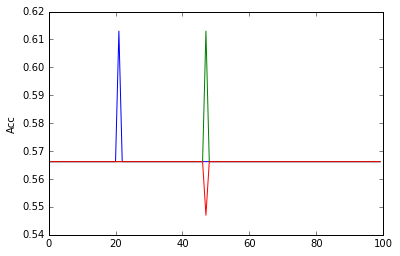

In [193]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(acc_single_dfs)
plt.plot(acc_single_xgb)
plt.plot(acc_single_ave_dfs)
plt.ylabel('Acc')
plt.show()

In [152]:
hoho, hoho_test = X_train[:, indexes.tolist()[0][3000:]], X_test[:, indexes.tolist()[0][3000:]]

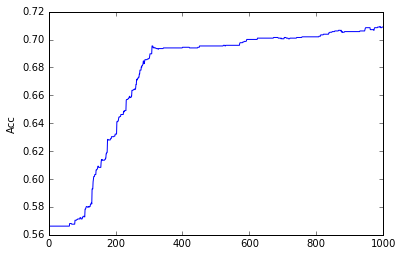

In [126]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(acc_scores_xgboost)
plt.ylabel('Acc')
plt.show()

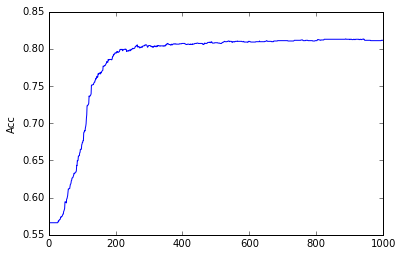

In [147]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(acc_scores_dfs)
plt.ylabel('Acc')
plt.show()

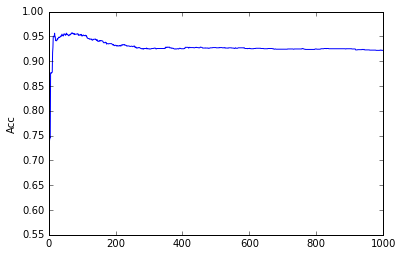

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(acc_scores_dfs_svm)
plt.ylabel('Acc')
plt.show()

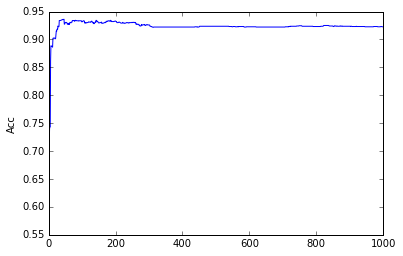

In [94]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(acc_scores_xgboost_svm)
plt.ylabel('Acc')
plt.show()

In [126]:
# columnNames[0][index_list_dfs][:50]

In [3]:
from sklearn.linear_model import RandomizedLogisticRegression

randomized_lasso = RandomizedLogisticRegression(selection_threshold=0.1)
randomized_lasso.fit(X_train, y_train)

featureMask = randomized_lasso.get_support()

In [4]:
xx = X_train[:,featureMask]

xx.shape

(8547, 54)

In [148]:
[i[0] for i in columnNames.reshape(7203,)[indexes_average_dfs[1:50]]]

[u'Phe9_494',
 u'Phe10_J439',
 u'Phe9_4912',
 u'Phe10_J309',
 u'Phe9_518',
 u'Phe9_4940',
 u'Phe10_J02',
 u'Phe9_491',
 u'Phe9_4939',
 u'Phe9_493',
 u'Phe9_428',
 u'Phe10_R060',
 u'Phe10_J47',
 u'Phe9_4938',
 u'Phe10_J44',
 u'Phe10_R09',
 u'Phe9_465',
 u'Phe9_492',
 u'Phe9_V854',
 u'Phe9_6260',
 u'Phe9_V25',
 u'Phe9_4928',
 u'LifeStatus',
 u'Phe10_J43',
 u'Phe9_V22',
 u'Phe10_E669',
 u'Phe10_R222',
 u'Phe10_N18',
 u'Phe10_M810',
 u'Phe9_626',
 u'Phe10_N91',
 u'Phe9_486',
 u'Phe10_G43',
 u'Phe10_Z720',
 u'Phe10_O99',
 u'Phe10_I739',
 u'Phe10_B373',
 u'Phe9_496',
 u'Phe10_J453',
 u'Phe9_443',
 u'Phe10_J459',
 u'Phe9_627',
 u'Phe9_585',
 u'Phe10_E660',
 u'Phe10_J449',
 u'Phe9_309',
 u'Phe9_5188',
 u'RGC_MI',
 u'Phe9_4280']

In [137]:
indexes_average_dfs

array([4881, 1377, 4877, ...,  331, 6344,  813])

In [138]:
indexes_dfs

array([1371, 1383, 1376, ..., 2648, 1509, 5396])